In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import pandas as pd

file_path = "C:/Users/xyz/Downloads/data analysis-redback/Runningdata.xlsx"

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)


In [4]:
df.head()


,event_id,timestamp,heart_rate,time_elapsed,total_running_time,altitude,distance,speed,cadence,start_time,...,total_time_spent_running_past_10800_to_14400_seconds,avg_temp,avg_temp2,avg_temp_mean,avg_lat,avg_long,avg_alt,avg_hr,total_dist,avg_temp_mode
0,7,2017-09-30 09:50:20,145,1258,1258,172.2,4.82220,12.4632,81,2017-09-29 23:43:07,...,0,17,17.0,17.000709,41.967184,-87.646859,175.538156,144.525532,5.41969,17
1,8,2017-10-01 01:59:42,153,419,419,173.8,1.61312,14.2776,83,2017-09-30 15:52:43,...,0,20,20.0,20.234432,41.974614,-87.649860,179.090408,152.765588,6.50893,22
2,8,2017-10-01 03:06:39,154,836,836,185.4,3.22131,14.6448,82,2017-09-30 15:59:43,...,0,20,20.0,20.234432,41.974614,-87.649860,179.090408,152.765588,6.50893,22
3,8,2017-10-01 03:13:28,153,1245,1245,179.2,4.83508,14.3424,83,2017-09-30 16:06:40,...,0,20,20.0,20.234432,41.974614,-87.649860,179.090408,152.765588,6.50893,22
4,8,2017-10-01 03:20:14,155,1651,1651,180.4,6.43923,14.5116,83,2017-09-30 16:13:29,...,0,20,20.0,20.234432,41.974614,-87.649860,179.090408,152.765588,6.50893,22


In [5]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (5543, 210)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Columns: 210 entries, event_id to avg_temp_mode
dtypes: datetime64[ns](4), float64(149), int64(52), object(5)
memory usage: 8.9+ MB


In [7]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 event_id              0
timestamp             0
heart_rate            0
time_elapsed          0
total_running_time    0
                     ..
avg_long              0
avg_alt               0
avg_hr                0
total_dist            0
avg_temp_mode         0
Length: 210, dtype: int64


In [8]:
# Summary statistics for numerical columns
print("Summary Statistics:\n", df.describe())


Summary Statistics:
           event_id   heart_rate  time_elapsed  total_running_time  \
count  5543.000000  5543.000000   5543.000000         5543.000000   
mean    408.059895   148.809850   2225.849179         1962.387696   
std     236.187026    16.424052   1673.395574         1510.609403   
min       6.000000    60.000000      1.000000            1.000000   
25%     205.000000   139.000000    984.000000          905.000000   
50%     396.000000   150.000000   1844.000000         1611.000000   
75%     605.000000   161.000000   2934.000000         2576.000000   
max     835.000000   239.000000  14263.000000        14263.000000   

          altitude     distance        speed      cadence  start_position_lat  \
count  5543.000000  5543.000000  5543.000000  5543.000000         5500.000000   
mean    177.465741     7.132767    12.847783    80.291719           41.906419   
std      21.715375     5.382823     3.486149    14.913895            0.629173   
min     -90.200000     0.004210  

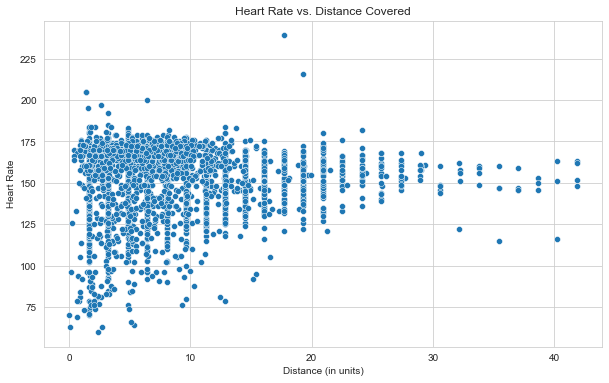

Correlation between altitude and speed: -0.03614094678118101


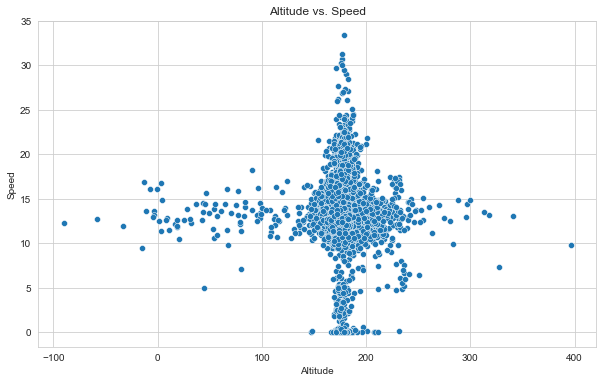

In [23]:
#Performance Analysis:
#How does heart rate vary with distance covered?
#Is there a correlation between altitude and speed?
# Plot heart rate vs. distance covered
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='heart_rate')
plt.title('Heart Rate vs. Distance Covered')
plt.xlabel('Distance (in units)')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Calculate correlation between altitude and speed
correlation = df['altitude'].corr(df['speed'])
print(f"Correlation between altitude and speed: {correlation}")

# Plot altitude vs. speed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='altitude', y='speed')
plt.title('Altitude vs. Speed')
plt.xlabel('Altitude')
plt.ylabel('Speed')
plt.grid(True)
plt.show()


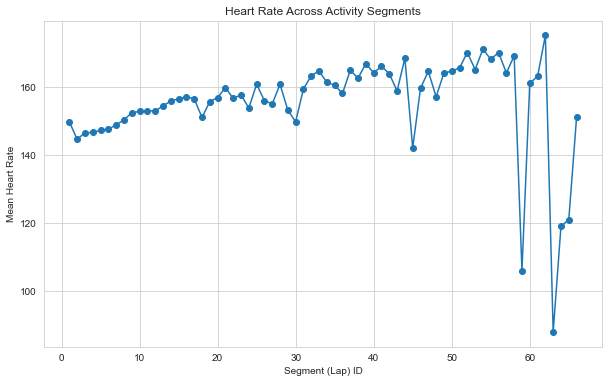

In [30]:
#Segment Analysis:
#How does performance (heart rate, speed, etc.) 
#vary across different segments of the activity (e.g., laps)?
#Analyzing Heart Rate Across Activity Segments:
# Group data by lap_id and calculate mean heart rate for each segment
heart_rate_by_segment = df.groupby('lap_id')['heart_rate'].mean()

# Plot the variation in heart rate across segments
plt.figure(figsize=(10, 6))
plt.plot(heart_rate_by_segment.index, heart_rate_by_segment.values, marker='o')
plt.title('Heart Rate Across Activity Segments')
plt.xlabel('Segment (Lap) ID')
plt.ylabel('Mean Heart Rate')
plt.grid(True)
plt.show()


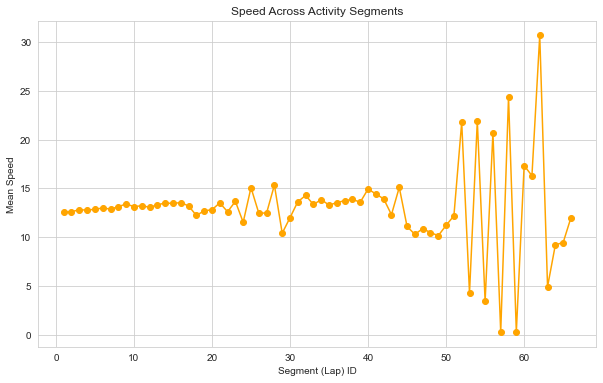

In [31]:
#Segment Analysis:
#How does performance (heart rate, speed, etc.) 
#vary across different segments of the activity (e.g., laps)?
#Analyzing Speed Across Activity Segments:
# Group data by lap_id and calculate mean speed for each segment
speed_by_segment = df.groupby('lap_id')['speed'].mean()

# Plot the variation in speed across segments
plt.figure(figsize=(10, 6))
plt.plot(speed_by_segment.index, speed_by_segment.values, marker='o', color='orange')
plt.title('Speed Across Activity Segments')
plt.xlabel('Segment (Lap) ID')
plt.ylabel('Mean Speed')
plt.grid(True)
plt.show()


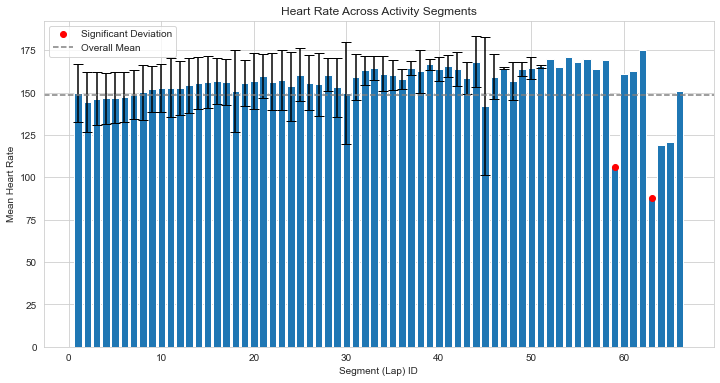

In [33]:
#Segment Analysis:
#Are there particular segments where the athlete
#performs notably better or worse? 
# Calculate overall statistics of heart rate
overall_hr_mean = df['heart_rate'].mean()
overall_hr_std = df['heart_rate'].std()

# Calculate summary statistics of heart rate for each segment (e.g., lap_id)
segment_hr_stats = df.groupby('lap_id')['heart_rate'].agg(['mean', 'std'])

# Identify segments where heart rate deviates significantly from overall statistics (e.g., using z-score)
segment_hr_stats['z_score'] = (segment_hr_stats['mean'] - overall_hr_mean) / overall_hr_std

# Define a threshold for significant deviation (e.g., z-score > 2 or < -2)
significant_segments = segment_hr_stats[(segment_hr_stats['z_score'] > 2) | (segment_hr_stats['z_score'] < -2)]

# Visualize the differences in heart rate across segments using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(segment_hr_stats.index, segment_hr_stats['mean'], yerr=segment_hr_stats['std'], capsize=5)
plt.scatter(significant_segments.index, significant_segments['mean'], color='red', label='Significant Deviation')
plt.axhline(y=overall_hr_mean, color='gray', linestyle='--', label='Overall Mean')
plt.xlabel('Segment (Lap) ID')
plt.ylabel('Mean Heart Rate')
plt.title('Heart Rate Across Activity Segments')
plt.legend()
plt.grid(True)
plt.show()


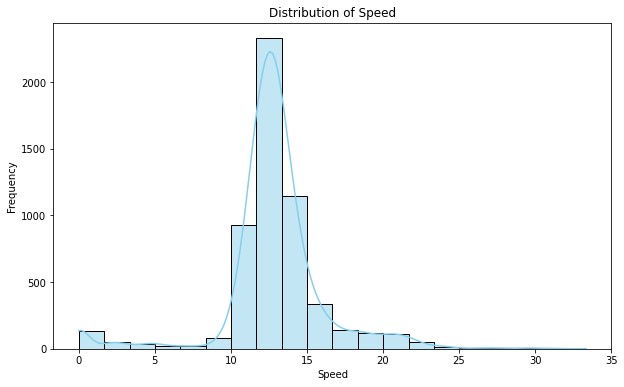

In [9]:
#Visualize the Distribution of Speed
# Create a new figure for the plot with specified dimensions
plt.figure(figsize=(10, 6))

# Create a histogram plot of the 'speed' column from the DataFrame df
# Set the number of bins (intervals) for the histogram to 20
# Add a kernel density estimate (KDE) plot on top of the histogram
# Set the color of the plot to 'skyblue'
sns.histplot(df['speed'], bins=20, kde=True, color='skyblue')

# Set the title of the plot
plt.title('Distribution of Speed')

# Set the label for the x-axis of the plot
plt.xlabel('Speed')

# Set the label for the y-axis of the plot
plt.ylabel('Frequency')

# Display the plot
plt.show()


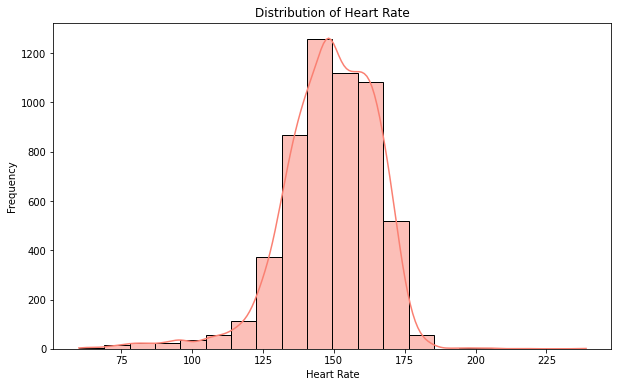

In [10]:
 #Visualize the Distribution of Heart Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['heart_rate'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

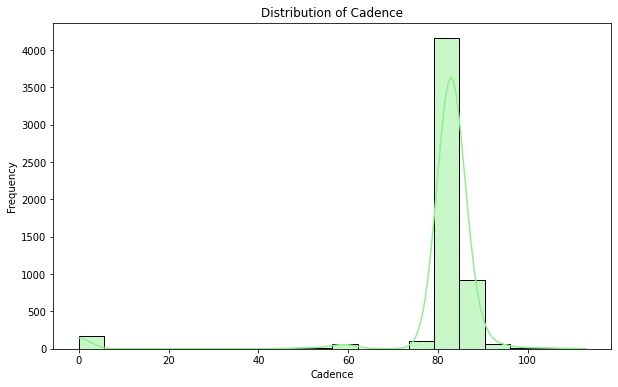

In [11]:
# Visualize the Distribution of Cadence
plt.figure(figsize=(10, 6))
sns.histplot(df['cadence'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Cadence')
plt.xlabel('Cadence')
plt.ylabel('Frequency')
plt.show()

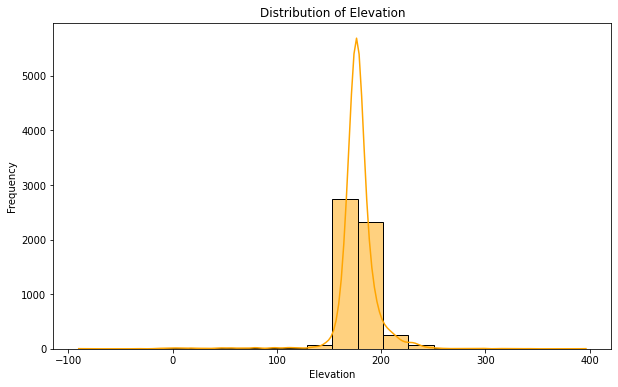

In [12]:
# Visualize the Distribution of Elevation
plt.figure(figsize=(10, 6))
sns.histplot(df['altitude'], bins=20, kde=True, color='orange')
plt.title('Distribution of Elevation')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.show()

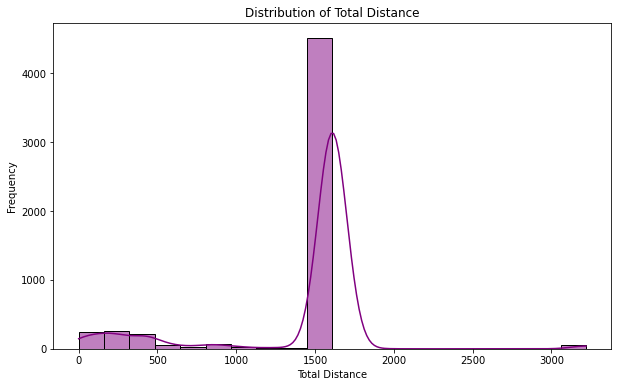

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_distance'], bins=20, kde=True, color='purple')
plt.title('Distribution of Total Distance')
plt.xlabel('Total Distance')
plt.ylabel('Frequency')
plt.show()


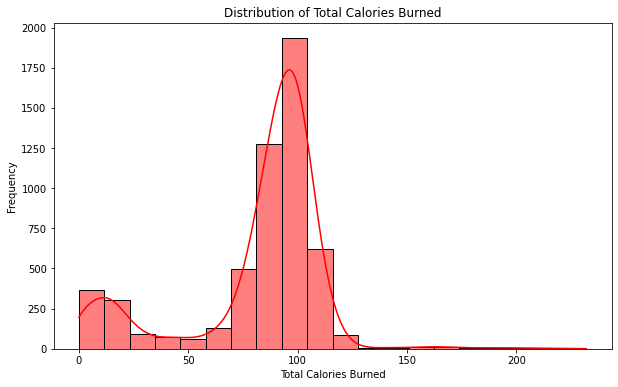

In [14]:
# Visualize the Distribution of Total Calories Burned
plt.figure(figsize=(10, 6))
sns.histplot(df['total_calories'], bins=20, kde=True, color='red')
plt.title('Distribution of Total Calories Burned')
plt.xlabel('Total Calories Burned')
plt.ylabel('Frequency')
plt.show()


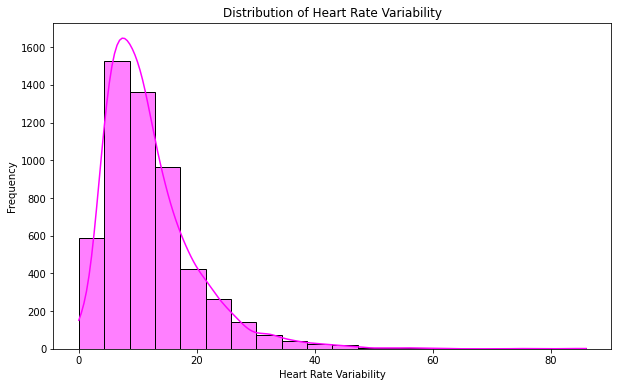

In [15]:
# Visualize the Distribution Heart Rate Variability
plt.figure(figsize=(10, 6))
sns.histplot(df['max_heart_rate'] - df['avg_heart_rate'], bins=20, kde=True, color='magenta')
plt.title('Distribution of Heart Rate Variability')
plt.xlabel('Heart Rate Variability')
plt.ylabel('Frequency')
plt.show()


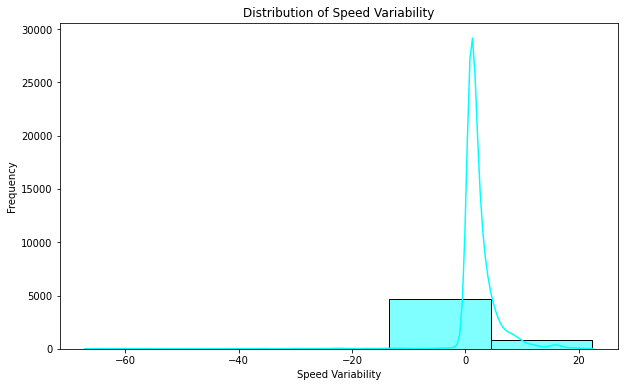

In [17]:
# Visualize the Distribution of Speed Variability
plt.figure(figsize=(10, 6))
sns.histplot(df['enhanced_max_speed'] - df['enhanced_avg_speed'], bins=5, kde=True, color='cyan')
plt.title('Distribution of Speed Variability')
plt.xlabel('Speed Variability')
plt.ylabel('Frequency')
plt.show()


In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert timestamp to datetime format
df.set_index('timestamp', inplace=True)  # Set timestamp as the index


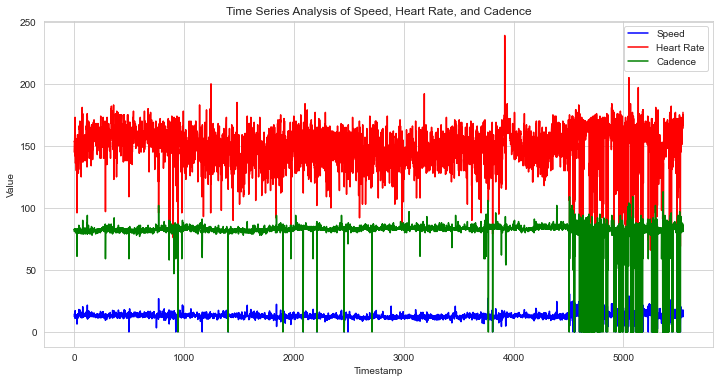

In [40]:
plt.figure(figsize=(12, 6))

# Plot speed
plt.plot(df['speed'], label='Speed', color='blue')

# Plot heart rate
plt.plot(df['heart_rate'], label='Heart Rate', color='red')

# Plot cadence
plt.plot(df['cadence'], label='Cadence', color='green')

plt.title('Time Series Analysis of Speed, Heart Rate, and Cadence')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


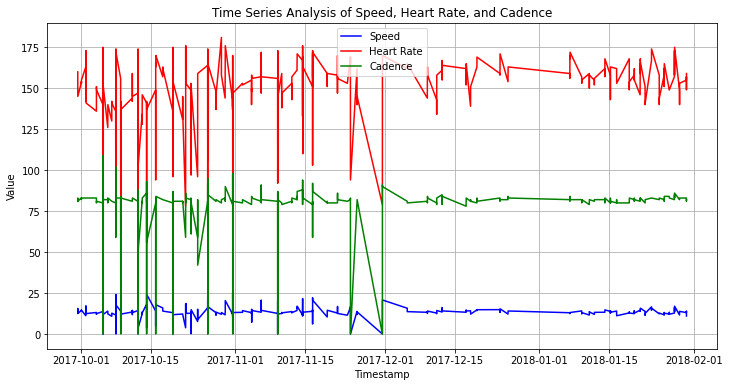

In [21]:
# Sort the DataFrame by the timestamp index
df.sort_index(inplace=True)

# Define the start and end dates for the desired time period
start_date = '2017-09-30'
end_date = '2018-01-30'

# Select data for the specified date range
df_subset = df.loc[start_date:end_date]

# Plot the subset of data
plt.figure(figsize=(12, 6))

# Plot speed
plt.plot(df_subset.index, df_subset['speed'], label='Speed', color='blue')

# Plot heart rate
plt.plot(df_subset.index, df_subset['heart_rate'], label='Heart Rate', color='red')

# Plot cadence
plt.plot(df_subset.index, df_subset['cadence'], label='Cadence', color='green')

plt.title('Time Series Analysis of Speed, Heart Rate, and Cadence')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


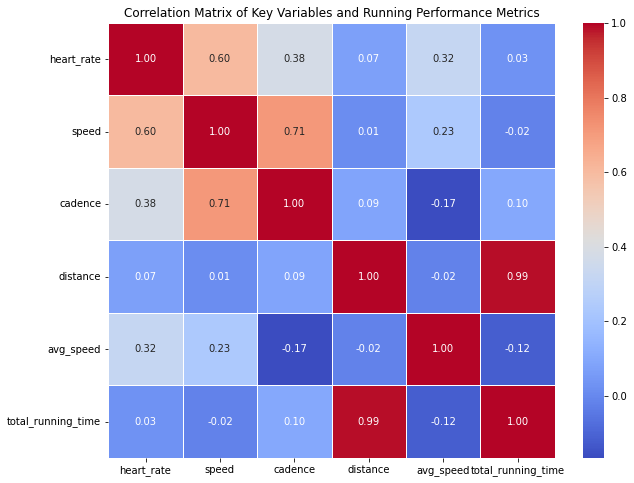

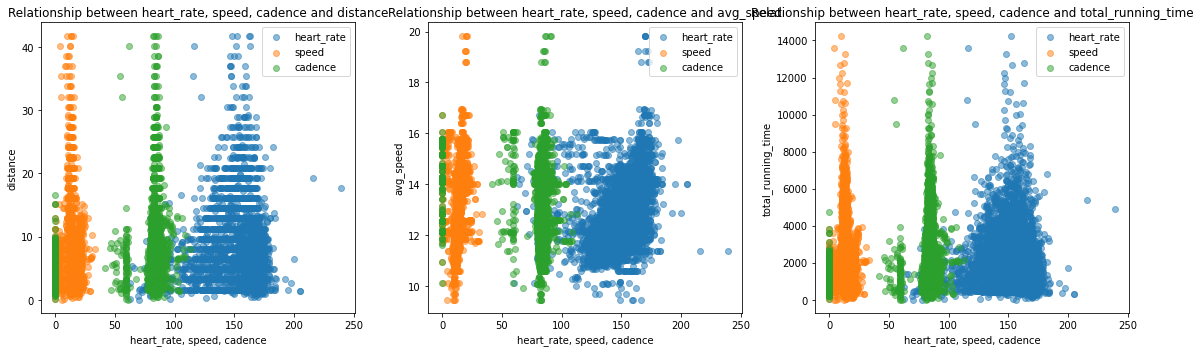

In [23]:


# Define the key variables and running performance metrics
key_variables = ['heart_rate', 'speed', 'cadence']
performance_metrics = ['distance', 'avg_speed', 'total_running_time']

# Calculate correlation coefficients
correlation_matrix = df[key_variables + performance_metrics].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Variables and Running Performance Metrics')
plt.show()

# Visualize the relationship between key variables and running performance metrics
# Create a figure with a specific size
plt.figure(figsize=(16, 5))

# Iterate over the performance metrics and their indices
for i, metric in enumerate(performance_metrics, 1):
    
    # Create subplots based on the number of performance metrics
    plt.subplot(1, len(performance_metrics), i)
    
    # Iterate over the key variables
    for var in key_variables:
        
        # Plot a scatter plot for each key variable against the current performance metric
        plt.scatter(df[var], df[metric], label=var, alpha=0.5)
    
    # Set the x-axis label to a formatted string containing the names of the key variables
    plt.xlabel('{}'.format(', '.join(key_variables)))
    
    # Set the y-axis label to the current performance metric
    plt.ylabel(metric)
    
    # Set the title of the subplot to describe the relationship between key variables and the current performance metric
    plt.title('Relationship between {} and {}'.format(', '.join(key_variables), metric))
    
    # Display a legend indicating the key variables
    plt.legend()

# Adjust the layout of the subplots to fit them properly within the figure
plt.tight_layout()

# Show the figure containing the scatter plots
plt.show()

    #Explanation
#The heatmap represents the correlation matrix between the key variables (e.g., heart rate, speed, cadence) and the running performance metrics (e.g., distance covered, average speed, total time elapsed). Each cell in the heatmap corresponds to the correlation coefficient between two variables.

#The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

#1 indicates a perfect positive correlation (as one variable increases, the other variable also increases).
#-1 indicates a perfect negative correlation (as one variable increases, the other variable decreases).
#0 indicates no linear correlation between the variables.
#The heatmap visually represents these correlation coefficients using colors, where warmer colors (e.g., red) indicate stronger positive correlations, cooler colors (e.g., blue) indicate stronger negative correlations, and neutral colors (e.g., white) indicate little to no correlation. This visualization helps identify which variables are strongly related to each other and how they may influence running performance metrics.

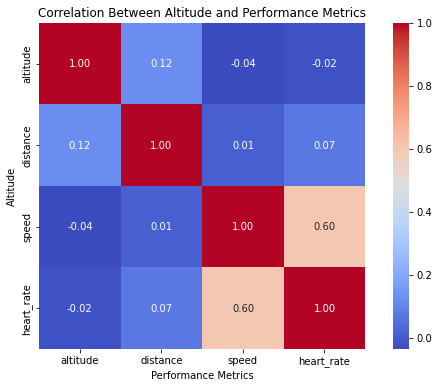

In [24]:
# Load your dataset into a pandas DataFrame
# Assuming your dataset is already loaded and contains columns for altitude and performance metrics

# Select the performance metrics to analyze
performance_metrics = ['distance', 'speed', 'heart_rate']

# Extract altitude and performance metrics from the DataFrame
altitude = df['altitude']  

# Calculate correlation coefficients
correlation_matrix = df[['altitude'] + performance_metrics].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Between Altitude and Performance Metrics')
plt.xlabel('Performance Metrics')
plt.ylabel('Altitude')
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

file_path = "C:/Users/xyz/Downloads/data analysis-redback/Runningdata.xlsx"

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)


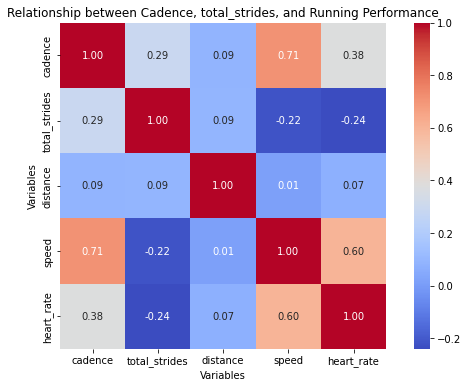

In [8]:
# Select the variables to analyze
variables_of_interest = ['cadence', 'total_strides', 'distance', 'speed', 'heart_rate']

# Extract data for the selected variables
selected_data = df[variables_of_interest]

# Calculate correlation coefficients
correlation_matrix = selected_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Relationship between Cadence, total_strides, and Running Performance')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

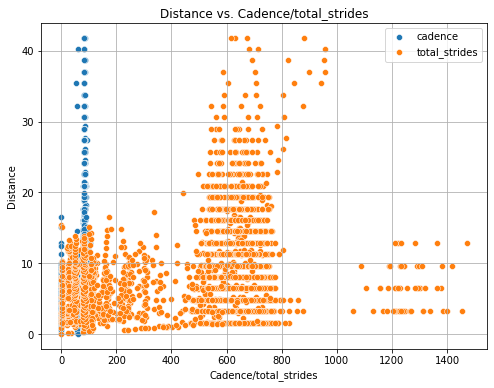

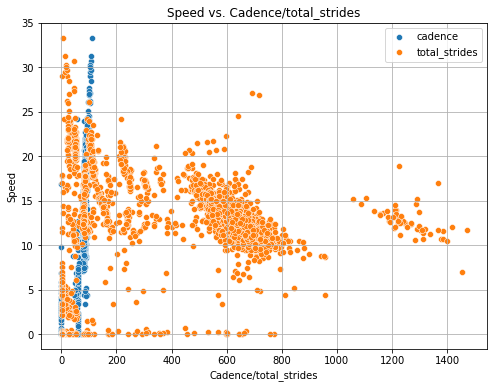

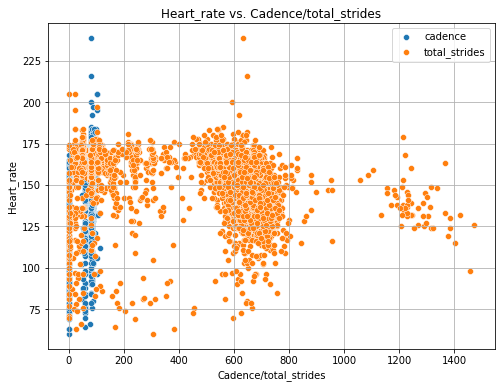

In [9]:
# Define the performance metrics and variables of interest
performance_metrics = ['distance', 'speed', 'heart_rate']
variables_of_interest = ['cadence', 'total_strides']

# Create scatter plots for each performance metric
for metric in performance_metrics:
    plt.figure(figsize=(8, 6))
    for variable in variables_of_interest:
        sns.scatterplot(data=df, x=variable, y=metric, label=variable)
    plt.title(f'{metric.capitalize()} vs. Cadence/total_strides')
    plt.xlabel('Cadence/total_strides')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


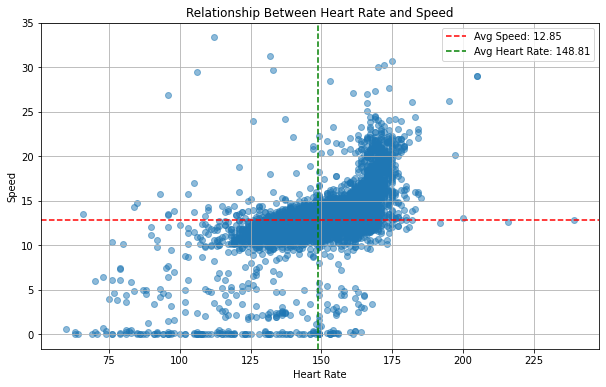

In [11]:
# Calculate average heart rate and speed for the entire dataset
avg_hr = df['heart_rate'].mean()
avg_speed = df['speed'].mean()

# Visualize the relationship between heart rate and speed for the entire dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['heart_rate'], df['speed'], alpha=0.5)
plt.title('Relationship Between Heart Rate and Speed')
plt.xlabel('Heart Rate')
plt.ylabel('Speed')
plt.axhline(y=avg_speed, color='r', linestyle='--', label=f'Avg Speed: {avg_speed:.2f}')
plt.axvline(x=avg_hr, color='g', linestyle='--', label=f'Avg Heart Rate: {avg_hr:.2f}')
plt.legend()
plt.grid(True)
plt.show()




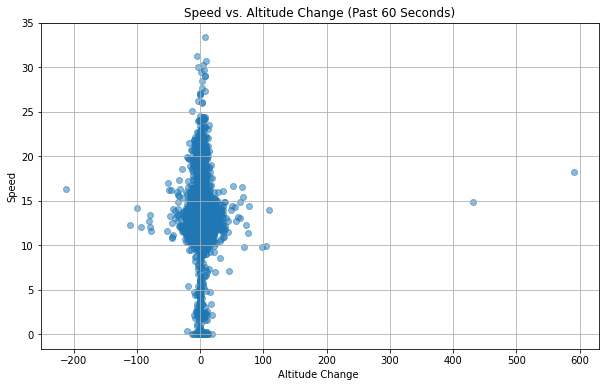

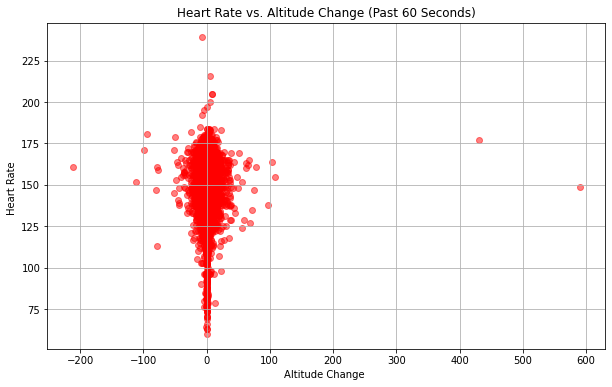

In [12]:
# Step 1: Analyze variations in speed and heart rate in response to altitude changes
# Scatter plot of speed vs. altitude change after 60 seconds
plt.figure(figsize=(10, 6))
plt.scatter(df['altitude_change_past_60_seconds'], df['speed'], alpha=0.5)
plt.title('Speed vs. Altitude Change (Past 60 Seconds)')
plt.xlabel('Altitude Change ')
plt.ylabel('Speed')
plt.grid(True)
plt.show()

# Scatter plot of heart rate vs. altitude change after 60 seconds
plt.figure(figsize=(10, 6))
plt.scatter(df['altitude_change_past_60_seconds'], df['heart_rate'], alpha=0.5, color='red')
plt.title('Heart Rate vs. Altitude Change (Past 60 Seconds)')
plt.xlabel('Altitude Change ')
plt.ylabel('Heart Rate ')
plt.grid(True)
plt.show()



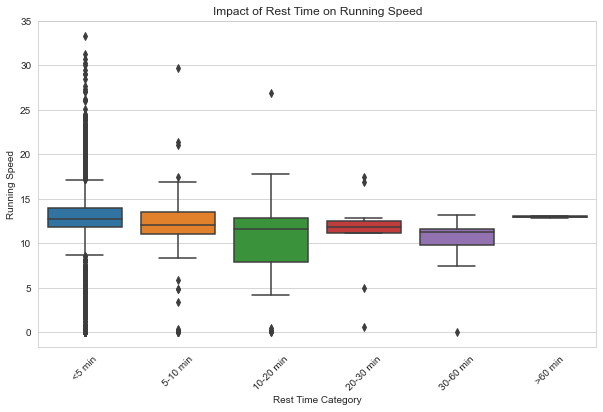

In [20]:
#Objective: Enhance Recovery Strategies
#. Impact of Rest Time on Running Performance:

# Segment the data based on rest time 
# Group data by 'rest_time' 
rest_groups = df.groupby('rest_time')


# Calculate performance metrics for each segment
performance_metrics = ['distance', 'speed', 'heart_rate']
performance_summary = rest_groups[performance_metrics].mean()

# Define the intervals and corresponding labels for rest time categories
rest_time_bins = [0, 5, 10, 20, 30, 60, float('inf')]
rest_time_labels = ['<5 min', '5-10 min', '10-20 min', '20-30 min', '30-60 min', '>60 min']

# Categorize rest time into different groups
df['rest_time_category'] = pd.cut(df['rest_time_minutes'], bins=rest_time_bins, labels=rest_time_labels, right=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a box plot to visualize the impact of rest time categories on running performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='rest_time_category', y='speed', data=df)
plt.title('Impact of Rest Time on Running Speed')
plt.xlabel('Rest Time Category')
plt.ylabel('Running Speed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()




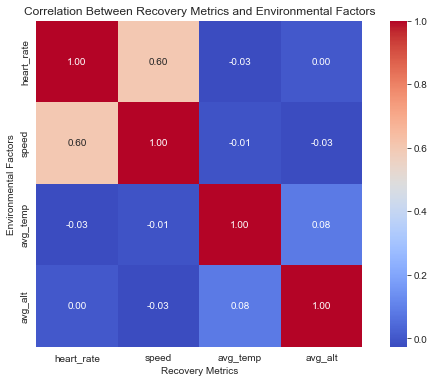

In [21]:
#Objective: Enhance Recovery Strategies
#Influence of Environmental Factors on Post-Run Recovery:
# Analyze the correlation between environmental factors and recovery metrics
recovery_metrics = ['heart_rate', 'speed']  
environmental_factors = ['avg_temp', 'avg_alt']
recovery_vs_environment = df[recovery_metrics + environmental_factors].corr()

# Visualize the relationship between environmental factors and recovery
plt.figure(figsize=(10, 6))
sns.heatmap(recovery_vs_environment, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Between Recovery Metrics and Environmental Factors')
plt.xlabel('Recovery Metrics')
plt.ylabel('Environmental Factors')
plt.show()
